<a href="https://colab.research.google.com/github/iguchi-lab/vent-net/blob/master/vent_net_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 計算の概要

## 節点iの風量収支


$$
    f_i(p_1, p_2, \cdots,p_n) = 0
$$

## 節点の圧力修正式

$$
     \begin{bmatrix}
        f_1(p_1, p_2, \cdots,p_n)\\
        f_2(p_1, p_2, \cdots,p_n)\\
        \vdots\\
        f_3(p_1, p_2, \cdots,p_n)\\
    \end{bmatrix}+
    \begin{bmatrix}
        \frac{\partial f_1}{\partial p_1} & \frac{\partial f_1}{\partial p_2} & \cdots & \frac{\partial f_1}{\partial p_n}\\
        \frac{\partial f_2}{\partial p_1}& \frac{\partial f_2}{\partial p_2} & \cdots & \frac{\partial f_2}{\partial p_n}\\
        \vdots & \vdots & \ddots & \vdots\\
        \frac{\partial f_n}{\partial p_1}& \frac{\partial f_n}{\partial p_2} & \cdots & \frac{\partial f_n}{\partial p_n}\\
    \end{bmatrix}
    \begin{bmatrix}
        \Delta p_1\\
        \Delta p_2\\
        \vdots\\
        \Delta p_n\\
    \end{bmatrix}=0\\
    -\boldsymbol b + \boldsymbol A\boldsymbol x = 0
$$

## 式の展開

$$
    \boldsymbol Ax = \boldsymbol b
    \quad\quad
    (\boldsymbol D + \boldsymbol L + \boldsymbol U)\boldsymbol x = \boldsymbol b\\
$$

$$
    \begin{pmatrix}
        a_{11} & a_{12} & a_{13}\\
        a_{21} & a_{22} & a_{23}\\
        a_{31} & a_{32} & a_{33}\\
    \end{pmatrix}
    \begin{pmatrix}
        x_1\\
        x_2\\
        x_3\\
    \end{pmatrix}=
    \begin{pmatrix}
        b_1\\
        b_2\\
        b_3\\
    \end{pmatrix}
    \\
    \Biggl\{\begin{pmatrix}
        a_{11} & 0 & 0\\
        0 & a_{22} & 0\\
        0 & 0 & a_{33}\\
    \end{pmatrix}+
    \begin{pmatrix}
        0 & 0 & 0\\
        a_{21} & 0 & 0\\
        a_{31} & a_{32} & 0\\
    \end{pmatrix}+
    \begin{pmatrix}
        0 & a_{12} & a_{13}\\
        0 & 0 & a_{23}\\
        0 & 0 & 0\\
    \end{pmatrix}\Biggr\}
    \begin{pmatrix}
        x_1\\
        x_2\\
        x_3\\
    \end{pmatrix}=
    \begin{pmatrix}
        b_1\\
        b_2\\
        b_3\\
    \end{pmatrix}\\
$$

$$
    a_{11}x_1 + a_{12}x_2 + a_{13}x_3 = b_1\\
    a_{21}x_1 + a_{22}x_2 + a_{23}x_3 = b_2\\
    a_{31}x_1 + a_{32}x_2 + a_{33}x_3 = b_3\\
$$

## 反復法への変換

$$
    \boldsymbol D\boldsymbol x^{(k+1)} = \boldsymbol b-(\boldsymbol L + \boldsymbol U)\boldsymbol x^{(k)} 
$$

$$
    a_{11}x_1^{(k+1)} = b_1 - (a_{12}x_2^{(k)} + a_{13}x_3^{(k)})\\
    a_{22}x_2^{(k+1)} = b_2 - (a_{21}x_1^{(k)} + a_{23}x_3^{(k)})\\
    a_{33}x_3^{(k+1)} = b_3 - (a_{31}x_1^{(k)} + a_{32}x_2^{(k)})\\
$$

## ヤコビ法

$$
    \boldsymbol x^{(k+1)} = \boldsymbol D^{-1}\bigl\{\boldsymbol b-(\boldsymbol L + \boldsymbol U)\boldsymbol x^{(k)}\bigr\}\\
$$

$$
    x_1^{(k+1)} = a_{11}^{-1}\bigl\{b_1 - (a_{12}x_2^{(k)} + a_{13}x_3^{(k)})\bigr\}\\
    x_2^{(k+1)} = a_{22}^{-1}\bigl\{b_1 - (a_{21}x_1^{(k)} + a_{23}x_3^{(k)})\bigr\}\\
    x_3^{(k+1)} = a_{33}^{-1}\bigl\{b_1 - (a_{31}x_1^{(k)} + a_{32}x_2^{(k)})\bigr\}\\
$$

## ガウス・ザイデル法

$$
    \boldsymbol x^{(k+1)} = \boldsymbol D^{-1}\bigl\{\boldsymbol b-\boldsymbol L\boldsymbol x^{(k+1)} - \boldsymbol U\boldsymbol x^{(k)}\bigr\}\\
$$

$$
    x_1^{(k+1)} = a_{11}^{-1}\bigl\{b_1 - (a_{12}x_2^{(k)} + a_{13}x_3^{(k)})\bigr\}\\
    x_2^{(k+1)} = a_{22}^{-1}\bigl\{b_1 - (a_{21}x_1^{(k+1)} + a_{23}x_3^{(k)})\bigr\}\\
    x_3^{(k+1)} = a_{33}^{-1}\bigl\{b_1 - (a_{31}x_1^{(k+1)} + a_{32}x_2^{(k+1)})\bigr\}\\
$$

## SOR法

$$
    \boldsymbol \xi^{(k+1)} = \boldsymbol D^{-1}\bigl\{\boldsymbol b-\boldsymbol L\boldsymbol x^{(k+1)} - \boldsymbol U\boldsymbol x^{(k)}\bigr\}\\
    \boldsymbol x^{(k+1)}=\boldsymbol x^{(k)}+\omega(\boldsymbol \xi^{(k+1)}-\boldsymbol x^{(k)})
$$

$$
    \boldsymbol x^{(k+1)}=\boldsymbol x^{(k)}+\omega\bigl[\boldsymbol D^{-1}\bigl\{\boldsymbol b-\boldsymbol L\boldsymbol x^{(k+1)} - \boldsymbol U\boldsymbol x^{(k)}\bigr\}-\boldsymbol x^{(k)}\bigr]\\
    (\boldsymbol D+\omega \boldsymbol L)\boldsymbol x^{(k+1)} = \{(1-\omega)\boldsymbol D\boldsymbol - \omega\boldsymbol U\}x^{(k)}+\omega\boldsymbol b\\
    \boldsymbol x^{(k+1)} = (\boldsymbol D + \omega\boldsymbol L)^{-1}\{(1-\omega)\boldsymbol D\boldsymbol - \omega\boldsymbol U\}x^{(k)}+ (\boldsymbol D + \omega\boldsymbol L)^{-1}\omega\boldsymbol b
$$

# 計算プログラム

## 必要なライブラリのインポート

In [ ]:
import math                                                                             #数学の計算
import numpy as np                                                                      #行列

## 空気密度の計算

In [ ]:
def get_rho(sita):								                                        #sitaを入力すると空気の密度rhoを返す
    return(353.25 / (sita + 273.15))

## 物理・計算定数

In [ ]:
G = 9.81                                                                                #重力加速度
Rho0 = get_rho(20)                                                                      #空気の密度

Step_P = 1e-6                                                                           #圧力変化の差分
COF = 1.0                                                                               #学習係数α
Max_ITR = 200                                                                           #最大繰り返し回数
Min_ERR = 0.001                                                                         #最小誤差

## 単純開口の風量の計算式

$$
    Q = \alpha A\sqrt{\frac{2}{\rho}\cdot\Delta P}
$$

In [ ]:
def Simple_Opening_Q(nt, dp):                                                           #単純開口の風量を返す関数　α、Ａ，Δpから風量を計算
    rho_0 = get_rho(room[nt[0]][1])
    rho_1 = get_rho(room[nt[1]][1])
    dp = dp - (rho_0 - rho_1) * G * nt[5] + nt[6]                                       #高さと外部圧力による補正
    return(nt[3] * nt[4] * np.sign(dp) * math.sqrt(abs(2 * dp / Rho0)))

## 送風ファンの風量計算式

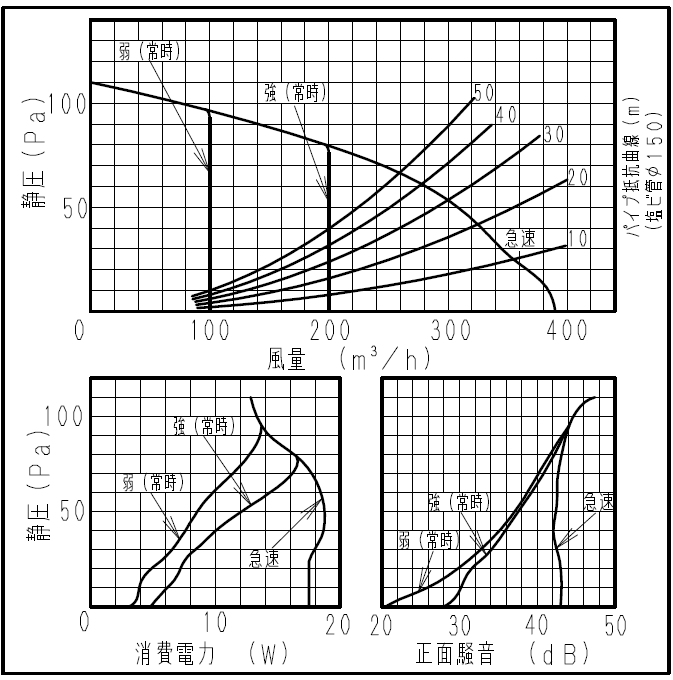

In [ ]:
def Fan_Q(nt, dp):                                                                      #送風ファンの風量を返す関数　ノッチとΔp（静圧）から風量を計算
    rho_0 = get_rho(room[nt[0]][1])
    rho_1 = get_rho(room[nt[1]][1])
    dp = dp - (rho_0 - rho_1) * G * nt[4] + nt[5]                                       #高さと外部圧力による補正
    if (nt[3] == 'L') & (dp < 90):                                                      #ノッチLの場合
        return(100 / 3600)
    elif (nt[3] == 'M') & (dp < 80):                                                    #ノッチMの場合
        return(200 / 3600)
    else:                                                                               #それ以外、ノッチLの場合
        return(max(min(- dp * (390 / 110) + 390, 0), 390) / 3600)

## 入力

In [ ]:
#室の定義　　室名、　温度[℃]
room = [['床上',   20.0],                                                               
        ['床下1',  28.4],
        ['床下2',  27.8], 
        ['床下3',  26.0],
        ['床下4',  27.4],
        ['床下5',  26.3],
        ['床下6',  27.3],
        ['床下7',  26.0],
        ['床下8',  27.3],
        ['床下9',  25.0],
        ['床下10', 24.4],
        ['床下11', 24.4],
        ['床下12', 22.9]]

#換気回路の定義（単純開口）　室番号1、　室番号2、　'simple'、　α、　Ａ、　高さ、　外力
#換気経路の定義（送風ファン）室番号1、　室番号2、　'fan'、　　ノッチ、　高さ、　外力

network = [[0,  2,  'simple', 1,    0.035,      0, 0],                                  
           [0,  2,  'simple', 1,    0.035,      0, 0],
           [0,  3,  'simple', 1,    0.035,      0, 0],
           [0,  4,  'simple', 1,    0.035,      0, 0],
           [0,  5,  'simple', 1,    0.035,      0, 0],
           [0,  6,  'simple', 1,    0.035,      0, 0],
           [0,  8,  'simple', 1,    0.035,      0, 0],
           [0, 10,  'simple', 1,    0.035,      0, 0],
           [0, 11,  'simple', 1,    0.035,      0, 0],
           [0, 12,  'simple', 1,    0.035,      0, 0],
           [1,  2,  'simple', 0.65, 0.6 * 0.35, 0, 0],
           [1,  3,  'simple', 0.65, 0.6 * 0.35, 0, 0],
           [1, 10,  'simple', 0.65, 0.6 * 0.35, 0, 0],
           [2,  1,  'simple', 0.65, 0.6 * 0.35, 0, 0],
           [2,  4,  'simple', 0.65, 0.6 * 0.35, 0, 0],
           [2, 10,  'simple', 0.65, 0.6 * 0.35, 0, 0],
           [3,  1,  'simple', 0.65, 0.6 * 0.35, 0, 0],
           [3,  4,  'simple', 0.65, 0.6 * 0.35, 0, 0],
           [3,  5,  'simple', 0.65, 0.6 * 0.35, 0, 0],
           [4,  6,  'simple', 0.65, 0.6 * 0.35, 0, 0],
           [5,  3,  'simple', 0.65, 0.6 * 0.35, 0, 0],
           [5,  4,  'simple', 0.65, 0.6 * 0.35, 0, 0],
           [6,  4,  'simple', 0.65, 0.6 * 0.35, 0, 0],
           [7,  2,  'simple', 0.65, 0.6 * 0.35, 0, 0],
           [7,  8,  'simple', 0.65, 0.6 * 0.35, 0, 0],
           [7,  9,  'simple', 0.65, 0.6 * 0.35, 0, 0],
           [8,  7,  'simple', 0.65, 0.6 * 0.35, 0, 0],
           [9,  7,  'simple', 0.65, 0.6 * 0.35, 0, 0],
           [9,  10, 'simple', 0.65, 0.6 * 0.35, 0, 0],
           [9,  11, 'simple', 0.65, 0.6 * 0.35, 0, 0],
           [9,  12, 'simple', 0.65, 0.6 * 0.35, 0, 0],
           [10,  1, 'simple', 0.65, 0.6 * 0.35, 0, 0],
           [10,  2, 'simple', 0.65, 0.6 * 0.35, 0, 0],
           [10,  9, 'simple', 0.65, 0.6 * 0.35, 0, 0],
           [10, 12, 'simple', 0.65, 0.6 * 0.35, 0, 0],
           [11,  9, 'simple', 0.65, 0.6 * 0.35, 0, 0],
           [12,  9, 'simple', 0.65, 0.6 * 0.35, 0, 0],
           [12, 10, 'simple', 0.65, 0.6 * 0.35, 0, 0],
           [0,   1, 'fan', 'M', 0, 0],
           [0,   1, 'fan', 'M', 0, 0],
           [0,   5, 'fan', 'M', 0, 0],
           [0,   5, 'fan', 'M', 0, 0],
           [0,   6, 'fan', 'M', 0, 0],
           [0,   6, 'fan', 'M', 0, 0],
           [0,   8, 'fan', 'M', 0, 0],
           [0,   8, 'fan', 'M', 0, 0]]

## 各節点の風量収支の計算

In [ ]:
def calc_Q_sum(pp):                                                                     #圧力データから各室の風量収支を返す関数
    Q_sum = np.zeros(len(room))                                                         #風量収支を初期化 =0
    for nt in network:                                                                  #ネットワーク分ループ
        dp = pp[nt[0]] - pp[nt[1]]                                                      #室の圧力差を計算
        if nt[2] == 'simple':                                                           #単純開口の場合
            Q = Simple_Opening_Q(nt, dp)
        elif nt[2] == 'fan':                                                            #送風ファンの場合
            Q = Fan_Q(nt, dp)
        else:                                                                           #それ以外の場合
            Q = 0
        Q_sum[nt[0]] -= Q                                                               #流出側
        Q_sum[nt[1]] += Q                                                               #流入側
    return(Q_sum)                                                                       #計算結果を返す

## SOR法による計算

In [ ]:
def SOR(A, b, tol):                                                                     #SOR法で連立方程式のを解く
    xOld = np.empty_like(b)                                                             #xOldの作成
    error = 1e12                                                                        #誤差の初期化（大きな値で初期化）

    D = np.diag(np.diag(A))                                                             #行列Aの対角行列
    L = np.tril(A, -1)                                                                  #行列Aの下三角行列
    U = A - L - D                                                                       #行列Aの上三角行列

    T = np.linalg.inv(D + COF * L)                                                      #xn+1の係数計算の逆行列
    Lw = np.dot(T, - COF * U + (1 - COF) * D)                                           #xnの係数
    c = np.dot(T, COF * b)                                                              #定数項c

    while error > tol:                                                                  #公差がtol未満になるまでループ
        x = np.dot(Lw, xOld) + c                                                        #漸化式から反復計算
        error = np.linalg.norm(x - xOld) / np.linalg.norm(x)                            #公差を計算
        xOld = x                                                                        #xOldの更新
    return x                                                                            #計算結果を返す

## メインプログラム

In [ ]:
p = np.zeros(len(room))                                                                 #圧力の初期化 =0
a = np.zeros((len(room), len(room)))                                                    #dF / dp の行列

for itr1 in range(Max_ITR):                                                             #メインループ
    Q_sum0 = calc_Q_sum(p)                                                              #各室の風量収支を計算
    print(itr1, np.linalg.norm(Q_sum0))  

    if np.linalg.norm(Q_sum0) < Min_ERR: break                                          #風量収支の平均２乗誤差が最小誤差以下であればループを抜ける（終了）

    for j in range(len(room)):                                                          #室の数だけループ
        temp_p = p.copy()                                                               #圧力をコピー
        temp_p[j] += Step_P                                                             #圧力を変化
        a[j] = (calc_Q_sum(temp_p) - Q_sum0).T / Step_P                                 #dF / dp を計算

    p += SOR(a, -Q_sum0, 1e-5)                                                          #SOR法で圧力を更新

print('finish calc!')

print('\nP [Pa]:')
for r, rm in enumerate(room):                                                           #各室圧力の出力
    print(r, rm[0], p[r] - p[0])

print('\nQ [m3/h]:')
for i, nt in enumerate(network):                                                        #各換気回路風量の出力
    dp = p[nt[0]] - p[nt[1]]                                                            #室0を圧力0として計算
    if nt[2] == 'simple':
        print(i, room[nt[0]][0], '->', room[nt[1]][0], Simple_Opening_Q(nt, dp) * 3600) #単純開口の風量を計算
    elif nt[2] == 'fan':
        print(i, room[nt[0]][0], '->', room[nt[1]][0], Fan_Q(nt, dp) * 3600)            #送風ファンの風量を計算

0 0.49690399499995336
1 0.47790053198662386
2 0.36497143319541536
3 0.16183404990414324
4 0.027847377211909802
5 0.0008215834342247213
finish calc!

P [Pa]:
0 床上 0.0
1 床下1 0.977699208840582
2 床下2 0.94961389275984
3 床下3 0.9786175986489448
4 床下4 0.9817366297207218
5 床下5 0.9953618527006247
6 床下6 1.0164773838220746
7 床下7 0.9615292457284986
8 床下8 0.996741277795888
9 床下9 0.9438144697327447
10 床下10 0.9458263297837126
11 床下11 0.9285019540969294
12 床下12 0.9408753381867266

Q [m3/h]:
0 床上 -> 床下2 -158.18413966036013
1 床上 -> 床下2 -158.18413966036013
2 床上 -> 床下3 -160.58165061049212
3 床上 -> 床下4 -160.8373483984013
4 床上 -> 床下5 -161.94960874497218
5 床上 -> 床下6 -163.65838721069548
6 床上 -> 床下8 -162.06178905833426
7 床上 -> 床下10 -157.86836342538857
8 床上 -> 床下11 -156.41587121907065
9 床上 -> 床下12 -157.45463500459937
10 床下1 -> 床下2 106.09469580693053
11 床下1 -> 床下3 -19.18525348881439
12 床下1 -> 床下10 113.02243544147206
13 床下2 -> 床下1 -106.09469580693053
14 床下2 -> 床下4 -113.46457342294839
15 床下2 -> 床下10 38.9613453920240

# 参考HP:

http://www.yamamo10.jp/yamamoto/lecture/2006/5E/test_3/html/node4.html


http://nkl.cc.u-tokyo.ac.jp/13n/SolverIterative.pdf


https://org-technology.com/posts/solving-linear-equations-yacobi.html


https://org-technology.com/posts/solving-linear-equations-gauss-seidel.html


https://org-technology.com/posts/solving-linear-equations-sor.html


https://drive.google.com/file/d/1QbkEMKg1v14Ji_EQdfLMd-IssbZVsg2Q/view?usp=sharing


https://qiita.com/PlanetMeron/items/63ac58898541cbe81ada